In [52]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from io import StringIO 
from IPython.display import Image 
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

client = MongoClient("localhost", 27017, maxPoolSize=50)
db = client.book
collection = db['FullTimeMatches']
cursor = collection.find()
df =  pd.DataFrame(list(cursor))
pd.set_option('display.max_rows', 5000)
pd.options.display.max_columns = None
df_Eredevisie =  df[df.league_name == 'Eredivisie'  ]
#df_Eredevisie =  df[df.league_name == 'Premier League'  ]
#df_Eredevisie =  df
df_minimal_Eredevisie = df_Eredevisie[[ 
                                                'homeredUpTo75'
                                        ,'awayredUpTo75'
                                        ,'homeyellowUpTo75'
                                        ,'awayyellowUpTo75'
                                        ,'homeGoalsUpTo75'
                                        ,'awayGoalsUpTo75' 
                                        ,'resultAt60_DRAW'
                                        ,'resultAt60_LOOSE'
                                        ,'resultAt60_WIN'
                                        ,'resultAt75_DRAW'
                                        ,'resultAt75_LOOSE'
                                        ,'resultAt75_WIN'
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'AwayTeamWhileAwayAverageAttack'
                                  
                                        ,'AwayTeamWhileAwayAverageDefence'
                                        ,'HomeTeamWhileHomeAverageDefence'
                                      ]].copy()




df_minimal_Eredevisie['goalScoredLast15'] = df_minimal_Eredevisie['goalScoredLast15'] == 1

df = df_minimal_Eredevisie 
dummyresult = pd.get_dummies(df['resultAt60'],prefix='resultAt60')


df = pd.concat([df,dummyresult], axis=1)


dummyresult = pd.get_dummies(df['resultAt75'],prefix='resultAt75')
dummyresult.head()
df = pd.concat([df,dummyresult], axis=1)

df['homeredUpTo75'] = df['homeredUpTo75'].astype(np.int64)
df['awayredUpTo75'] = df['awayredUpTo75'].astype(np.int64)
df['homeyellowUpTo75'] = df['homeyellowUpTo75'].astype(np.int64)
df['awayyellowUpTo75'] = df['awayyellowUpTo75'].astype(np.int64)
df['homeGoalsUpTo75'] = df['homeGoalsUpTo75'].astype(np.int64)
df['awayGoalsUpTo75'] = df['awayGoalsUpTo75'].astype(np.int64)



Accuracy: 0.5171537484116899


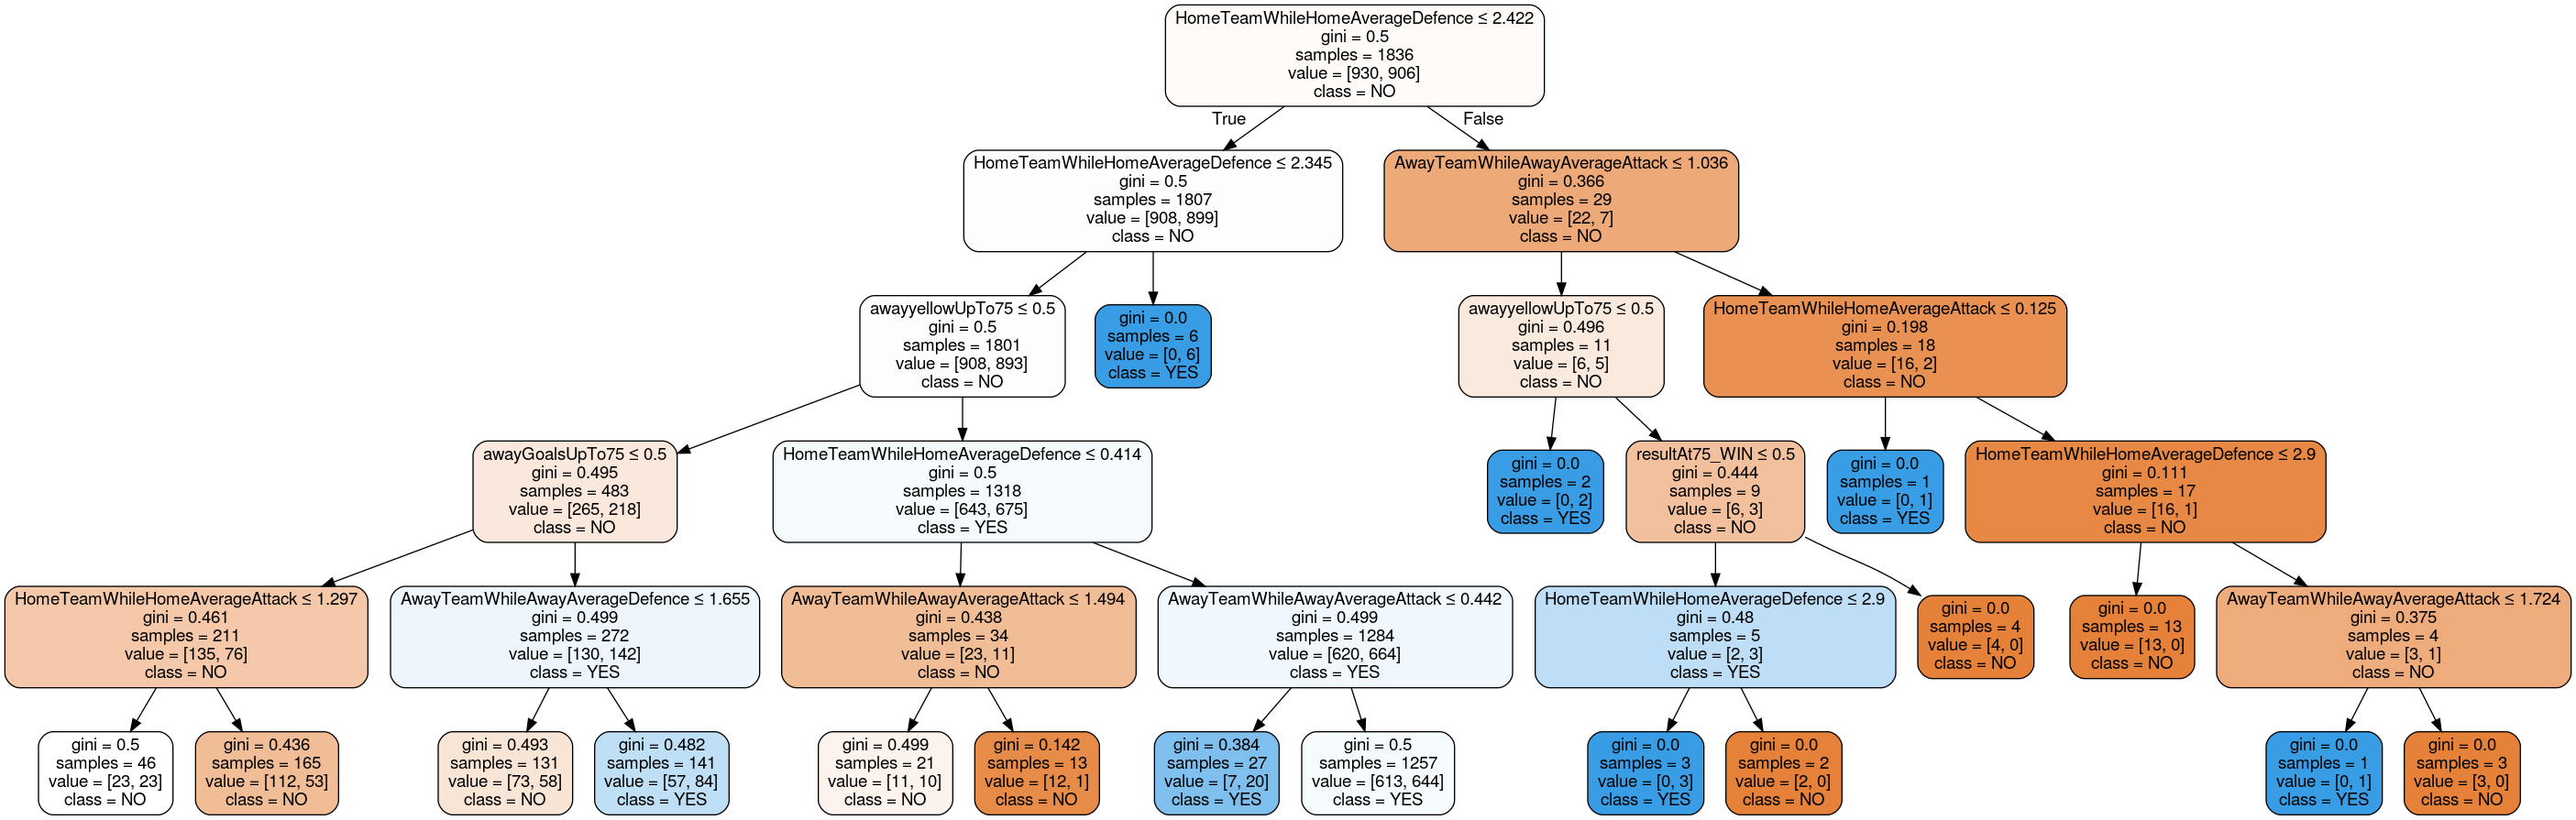

In [56]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
df_minimal_Eredevisie = df 


def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())




#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
feature_cols = [                        'homeredUpTo75'
                                        ,'awayredUpTo75'
                                        ,'homeyellowUpTo75'
                                        ,'awayyellowUpTo75'
                                        ,'homeGoalsUpTo75'
                                        ,'awayGoalsUpTo75' 
                                        ,'resultAt60_DRAW'
                                        ,'resultAt60_LOOSE'
                                        ,'resultAt60_WIN'
                                        ,'resultAt75_DRAW'
                                        ,'resultAt75_LOOSE'
                                        ,'resultAt75_WIN'
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'AwayTeamWhileAwayAverageAttack'
                                  
                                        ,'AwayTeamWhileAwayAverageDefence'
                                        ,'HomeTeamWhileHomeAverageDefence'
                
                                
                    
               ]
                                        
X = df_minimal_Eredevisie[feature_cols] # Features
y = df_minimal_Eredevisie.goalScoredLast15 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_decision_tree(clf, X_train.columns,['NO','YES'])

In [73]:
df_minimal_Eredevisie.dtypes

homeredUpTo75                       int64
awayredUpTo75                       int64
homeyellowUpTo75                    int64
awayyellowUpTo75                    int64
homeGoalsUpTo75                     int64
awayGoalsUpTo75                     int64
resultAt60                         object
resultAt75                         object
goalScoredLast15                     bool
HomeTeamWhileHomeAverageAttack    float64
resultAt60_DRAW                     uint8
resultAt60_LOOSE                    uint8
resultAt60_WIN                      uint8
resultAt75_DRAW                     uint8
resultAt75_LOOSE                    uint8
resultAt75_WIN                      uint8
dtype: object